# TOYOTA COROLLA ANALYSIS

In [1]:
# importing the packages--
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
# reading the data file--
def read_data():
    data=pd.read_excel("C:/ANKITA/ASSIGNMENTS/Day 21 - 14th May/Multiple Linear Regression/Assignment 2/ToyotaCorolla.xlsx")
    return data

In [4]:
# calling the function--
data=pd.read_excel("C:/ANKITA/ASSIGNMENTS/Day 21 - 14th May/Multiple Linear Regression/Assignment 2/ToyotaCorolla.xlsx")
print(data.head(5))

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1     

In [5]:
# renaming the columns--
data=data.rename({ "R&D Spend":'R&D',"Marketing Spend":'marketing',"Administration":"administration","State":"state","Profit":"profit"},axis=1)
print(data.head(5))

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1     

In [6]:
# checking the missing values--
data.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [7]:
# printing basic info about data--
print(data.columns)
print("Data types---")
print("==========================")
print(data.dtypes)
print("==========================")
print("Info---")
print(data.info())
print("==========================")

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')
Data types---
Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears           

In [8]:
print("Average Price:")
print(data["Price"].mean())
print("==========================")
print("Average Accumulated Kilometers on odometer:")
print(data["KM"].mean())
print("==========================")
print("Average Cylinder Volume in cubic centimeters:")
print(data["cc"].mean())
print("==========================")
print("Average Quarterly road tax in EUROs:")
print(data["Quarterly_Tax"].mean())
print("==========================")
print("Average Weight in Kilograms:")
print(data["Weight"].mean())
print("==========================")

Average Price:
10730.824512534818
Average Accumulated Kilometers on odometer:
68533.25974930362
Average Cylinder Volume in cubic centimeters:
1576.8558495821726
Average Quarterly road tax in EUROs:
87.12256267409471
Average Weight in Kilograms:
1072.4596100278552


In [9]:
lb= LabelEncoder()
data["Fuel_Type"]=lb.fit_transform(data["Fuel_Type"])

In [10]:
print(data.head())
print(data.dtypes)

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM  Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986          1  90          1  ...            1   
1         10      2002  72937          1  90          1  ...            1   
2          9      2002  41711          1  90          1  ...            0   
3          7      2002  48000          1  90          0  ...            0   
4          3      2002  38500          1  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                

# Exploratory Data Analysis

<Axes: >

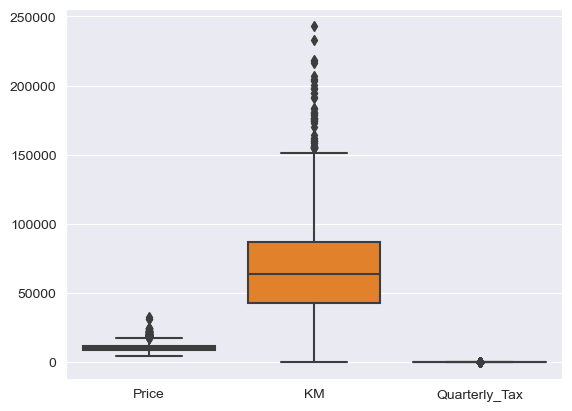

In [20]:
# checking the outliers--
sns.boxplot(data=data.loc[:, ['Price', 'KM','Quarterly_Tax']],palette="tab10")

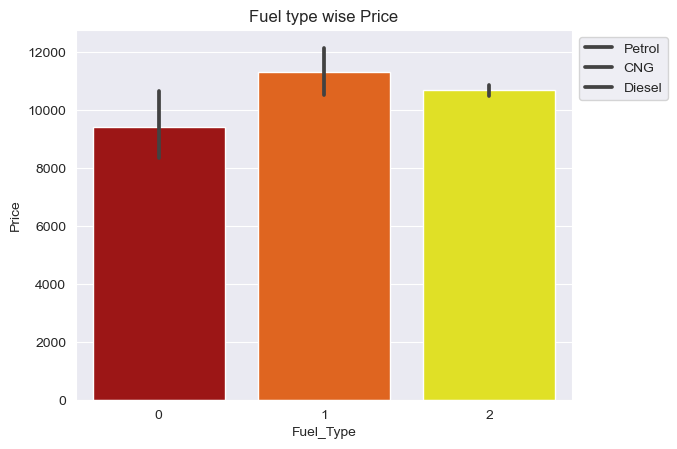

In [21]:
# fuel type wise price--
ax=sns.barplot(x=data["Fuel_Type"],y=data["Price"],data=data,palette="hot")
plt.title("Fuel type wise Price")
ax.legend( bbox_to_anchor=(1,1),labels=["Petrol","CNG","Diesel"])

Text(0.5, 1.0, 'Fuel type wise Price percentages')

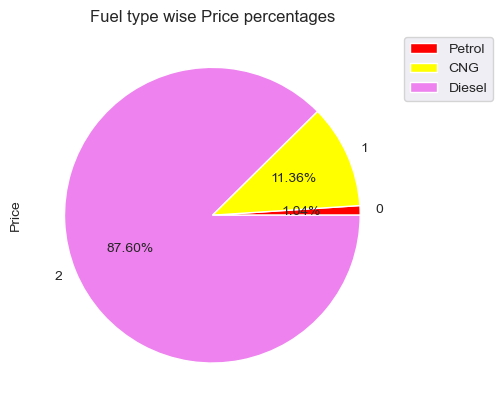

In [23]:
ax=data.groupby(["Fuel_Type"])["Price"].sum().plot(kind="pie",colors=['red','yellow','violet'],autopct='%.2f%%')
ax.legend( bbox_to_anchor=(1,1),labels=["Petrol","CNG","Diesel"])
plt.title("Fuel type wise Price percentages")

Text(0.5, 1.0, 'Accumulated Kilometers on odometer VS Price')

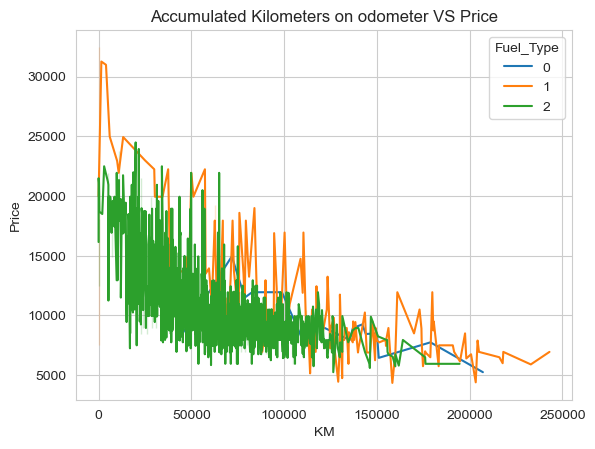

In [36]:
sns.set_style("whitegrid")
sns.lineplot(x="KM",y="Price",data=data,hue="Fuel_Type",palette='tab10')
plt.title("Accumulated Kilometers on odometer VS Price")

Text(0.5, 1.0, 'Quarterly road tax in EUROs VS Price')

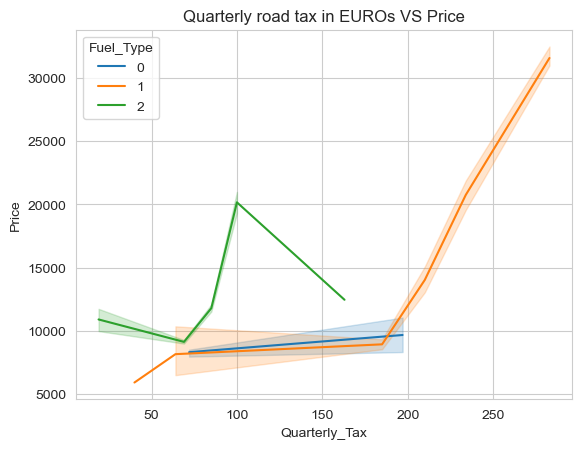

In [37]:
sns.set_style("whitegrid")
sns.lineplot(x="Quarterly_Tax",y="Price",data=data,hue="Fuel_Type",palette='tab10')
plt.title("Quarterly road tax in EUROs VS Price")

Text(0.5, 1.0, 'Weight in Kilograms VS Price')

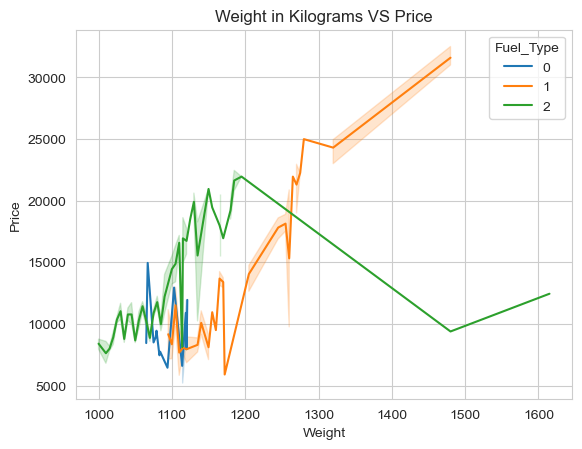

In [35]:
sns.set_style("whitegrid")
sns.lineplot(x="Weight",y="Price",data=data,hue="Fuel_Type",palette='tab10')
plt.title("Weight in Kilograms VS Price")

Text(0.5, 1.0, 'Cylinder Volume in cubic centimeters VS Price')

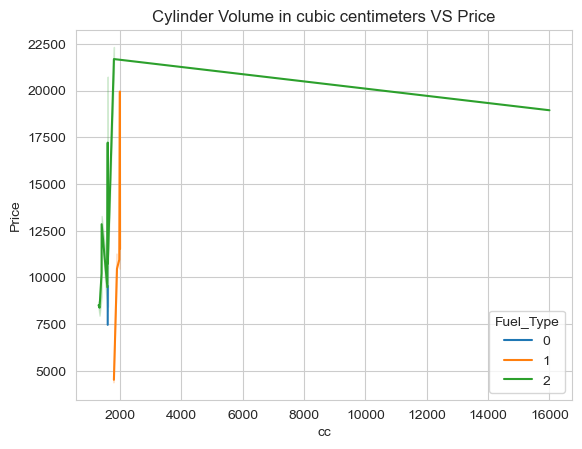

In [34]:
sns.set_style("whitegrid")
sns.lineplot(x="cc",y="Price",data=data,hue="Fuel_Type",palette='tab10')
plt.title("Cylinder Volume in cubic centimeters VS Price")

<Axes: >

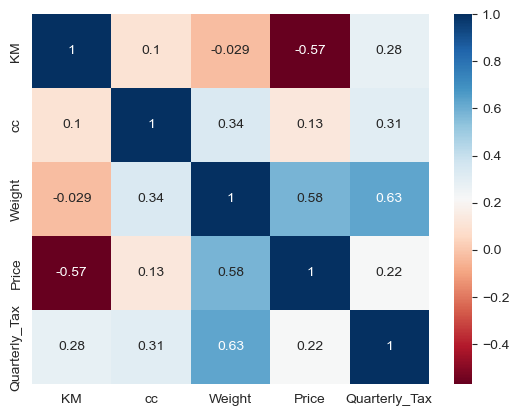

In [72]:
sns.heatmap(data[["KM","cc","Weight","Price","Quarterly_Tax"]].corr(),annot=True,cmap="RdBu")

# Linear Regression

### Prediction model for predicting price

In [73]:
# multiple linear regression--
df=data[["KM","cc","Weight","Quarterly_Tax","Price"]]
print(df.head())

      KM    cc  Weight  Quarterly_Tax  Price
0  46986  2000    1165            210  13500
1  72937  2000    1165            210  13750
2  41711  2000    1165            210  13950
3  48000  2000    1165            210  14950
4  38500  2000    1170            210  13750


In [74]:
df.shape

(1436, 5)

In [75]:
# sampling of data--
training,testing=train_test_split(df,test_size=0.2)
training.head()

,KM,cc,Weight,Quarterly_Tax,Price
959,50925,1600,1070,85,8895
1250,78435,1300,1015,69,8950
503,56743,1600,1045,69,9990
1361,59164,1600,1035,69,6495
936,54936,1600,1075,85,10950


In [76]:
testing.head()

,KM,cc,Weight,Quarterly_Tax,Price
849,65463,1600,1070,85,9950
398,117175,1600,1035,69,10500
125,36000,1600,1130,85,21750
593,22648,1400,1060,85,10950
1330,65021,2000,1115,185,8950


In [77]:
training.shape,testing.shape

((1148, 5), (288, 5))

In [84]:
# defining--
x=training[["KM","cc","Weight","Quarterly_Tax"]]
y=training["Price"]

In [85]:
model=LinearRegression()
print(model)

LinearRegression()


In [89]:
model_train=model.fit(x,y)
print("Model training is completed")
print(train_model)

Model training is completed
LinearRegression()


In [90]:
print(model.coef_)
print(model.intercept_)

[-0.0508327  -0.23649398 46.20797903 -3.39833014]
-34675.83946138356


<Axes: xlabel='KM', ylabel='Price'>

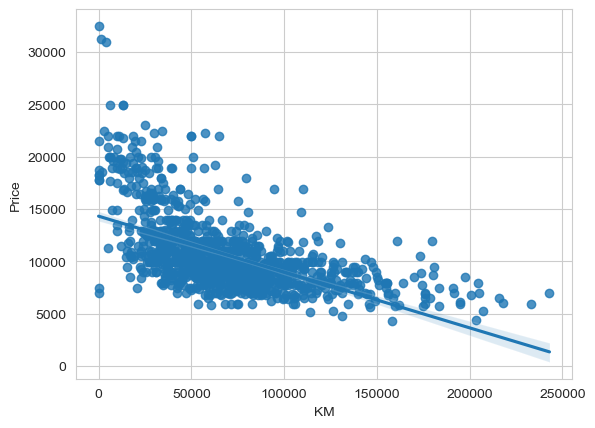

In [102]:
sns.regplot(x="KM",y="Price",data=training)

<Axes: xlabel='cc', ylabel='Price'>

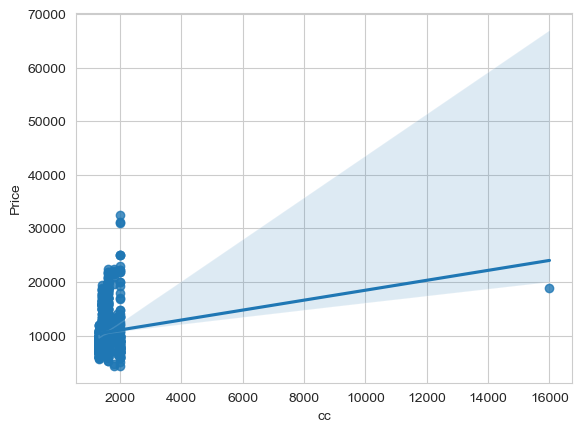

In [104]:
sns.regplot(x="cc",y="Price",data=training)

<Axes: xlabel='Weight', ylabel='Price'>

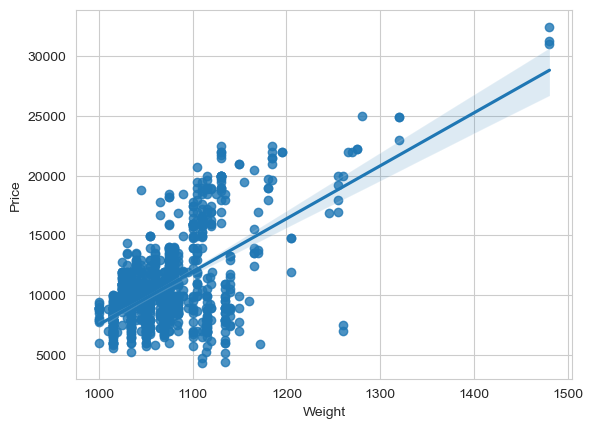

In [105]:
sns.regplot(x="Weight",y="Price",data=training)

<Axes: xlabel='Quarterly_Tax', ylabel='Price'>

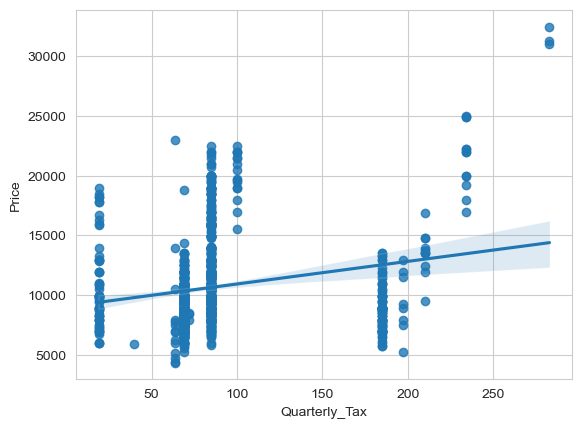

In [106]:
sns.regplot(x="Quarterly_Tax",y="Price",data=training)

In [107]:
X_test=testing[["KM","cc","Weight","Quarterly_Tax"]]
X_test

,KM,cc,Weight,Quarterly_Tax
849,65463,1600,1070,85
398,117175,1600,1035,69
125,36000,1600,1130,85
593,22648,1400,1060,85
1330,65021,2000,1115,185
...,...,...,...,...
1240,82021,1300,1035,69
1398,48400,1600,1075,85
438,77780,1600,1040,69
985,45000,1600,1085,85


In [110]:
pred_price=train_model.predict(X_test)
pred_price

array([10771.78838803,  6580.22163307, 15041.95107751, 12533.40960101,
       12439.18489213, 11255.76655948,  8500.23945384, 15155.27646429,
       10966.44220498, 10215.07706191, 11019.74289366, 15014.29808672,
       10400.05408329, 16312.76866877, 13492.67019775,  6824.74270882,
       35247.36519237, 13292.89225003, 11355.25141759, 10907.57463332,
        7501.09788991,  9196.33566085,  9675.18695347,  9435.74876064,
       13130.02443284, 10486.62375733,  7812.37108176, 16437.96961786,
        7561.49591806,  9931.7779602 ,  9367.95347887, 13824.54827341,
       11113.89406332,  9831.79528918, 10319.02468381, 12277.38820417,
        7203.59862284,  9224.13589268,  9454.83009652, 11534.69086147,
       10823.4462825 ,  6646.20248241, 10685.92827422,  8128.63661897,
       10227.57871981, 15716.67810046, 10268.45872766,  8978.15643972,
       10369.54920404, 14582.29209639, 10139.28724714, 11290.4270406 ,
       17098.27930077, 10195.95552107, 14262.23390798, 17329.77546626,
      

In [111]:
testing["pred_price"]=pred_price
testing

,KM,cc,Weight,Quarterly_Tax,Price,pred_price
849,65463,1600,1070,85,9950,10771.788388
398,117175,1600,1035,69,10500,6580.221633
125,36000,1600,1130,85,21750,15041.951078
593,22648,1400,1060,85,10950,12533.409601
1330,65021,2000,1115,185,8950,12439.184892
...,...,...,...,...,...,...
1240,82021,1300,1035,69,8750,8438.142692
1398,48400,1600,1075,85,8950,11870.186706
438,77780,1600,1040,69,10250,8813.815889
985,45000,1600,1085,85,9950,12505.097688


In [112]:
testing["Error"]=testing["Price"]-testing["pred_price"]
testing

,KM,cc,Weight,Quarterly_Tax,Price,pred_price,Error
849,65463,1600,1070,85,9950,10771.788388,-821.788388
398,117175,1600,1035,69,10500,6580.221633,3919.778367
125,36000,1600,1130,85,21750,15041.951078,6708.048922
593,22648,1400,1060,85,10950,12533.409601,-1583.409601
1330,65021,2000,1115,185,8950,12439.184892,-3489.184892
...,...,...,...,...,...,...,...
1240,82021,1300,1035,69,8750,8438.142692,311.857308
1398,48400,1600,1075,85,8950,11870.186706,-2920.186706
438,77780,1600,1040,69,10250,8813.815889,1436.184111
985,45000,1600,1085,85,9950,12505.097688,-2555.097688


In [113]:
round(r2_score(testing['Price'],testing['pred_price'])*100,2)

45.85

<Axes: xlabel='KM', ylabel='Price'>

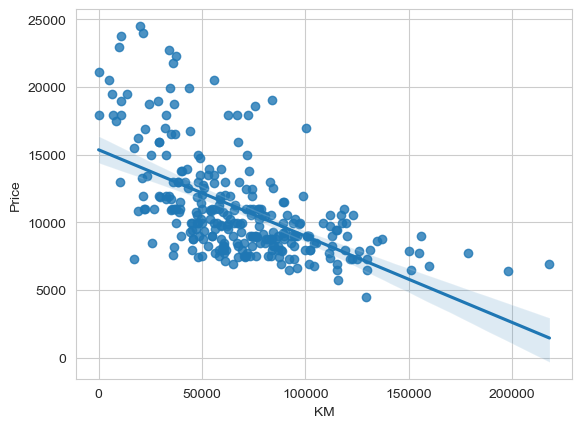

In [114]:
sns.regplot(x="KM",y="Price",data=testing)

<Axes: xlabel='cc', ylabel='Price'>

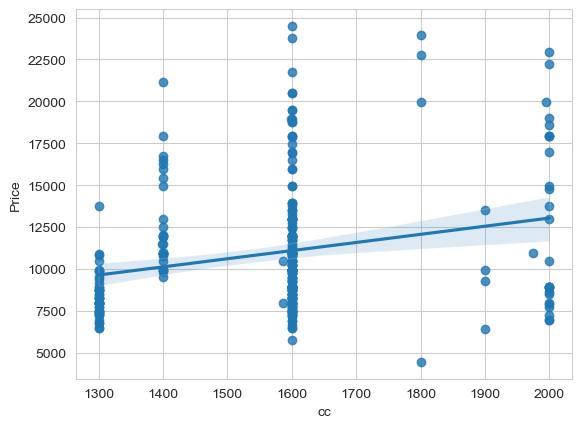

In [115]:
sns.regplot(x="cc",y="Price",data=testing)

<Axes: xlabel='Weight', ylabel='Price'>

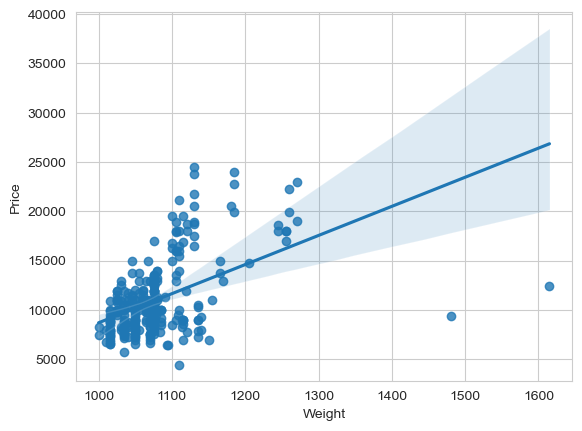

In [116]:
sns.regplot(x="Weight",y="Price",data=testing)

<Axes: xlabel='Quarterly_Tax', ylabel='Price'>

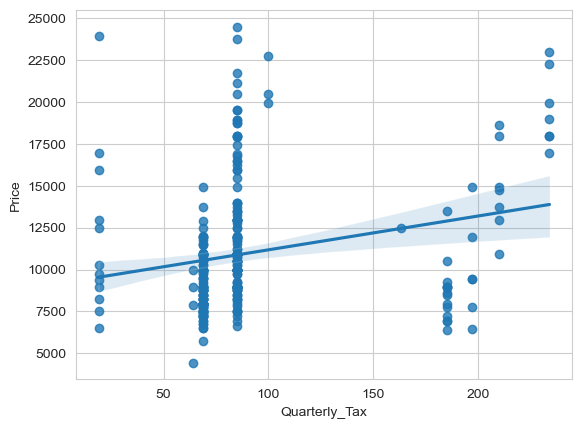

In [117]:
sns.regplot(x="Quarterly_Tax",y="Price",data=testing)